## REGRESSION PROJECT SOLUTION - AUTOSCOUT

In [78]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [79]:
df=pd.read_pickle("golden_data_dummy.pkl")

In [80]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [81]:
df.shape

(14990, 136)

In [82]:
df.corr()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
displacement,1.000000,0.608069,0.306380,0.039455,0.219180,0.256791,0.075198,0.284346,0.008668,0.011990,...,0.101407,0.647354,-0.004512,-0.643471,-0.027935,-0.036014,-0.002039,-0.089162,-0.104255,0.132912
hp,0.608069,1.000000,0.013735,-0.025535,0.252995,0.331149,0.040451,0.433349,-0.026401,-0.048050,...,0.094190,0.111304,0.009755,-0.107138,-0.034652,0.111306,-0.016734,0.067898,-0.036446,-0.057641
km,0.306380,0.013735,1.000000,0.003092,0.046383,0.007789,0.106760,-0.018739,-0.015460,0.077596,...,0.032341,0.428175,0.002026,-0.433719,0.045312,-0.180433,-0.100492,-0.217220,-0.280735,0.442080
ss_abs,0.039455,-0.025535,0.003092,1.000000,0.043162,0.040839,-0.031936,0.046580,0.248538,0.070964,...,-0.042177,0.019120,-0.023786,-0.020374,0.014457,0.013637,0.021455,0.005178,0.030786,-0.041733
ss_adaptive_cruise_control,0.219180,0.252995,0.046383,0.043162,1.000000,0.202003,0.255668,0.316794,0.037572,0.104905,...,0.239071,0.092960,0.017857,-0.102319,0.071671,0.048770,0.031647,-0.020815,-0.008863,-0.026030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
type_Demonstration,-0.036014,0.111306,-0.180433,0.013637,0.048770,0.043205,-0.058861,0.106895,0.031162,-0.052810,...,-0.025849,-0.123895,-0.002695,0.125743,-0.014668,1.000000,-0.062618,-0.055877,-0.073438,-0.390428
type_Employee's car,-0.002039,-0.016734,-0.100492,0.021455,0.031647,0.022449,-0.017133,0.013814,0.051146,-0.007933,...,-0.018475,0.003158,-0.003100,-0.002038,-0.008357,-0.062618,1.000000,-0.064264,-0.084460,-0.449029
type_New,-0.089162,0.067898,-0.217220,0.005178,-0.020815,0.028177,-0.024663,0.051672,0.003759,-0.055720,...,-0.017066,-0.163772,-0.002766,0.164474,-0.005645,-0.055877,-0.064264,1.000000,-0.075368,-0.400694
type_Pre-registered,-0.104255,-0.036446,-0.280735,0.030786,-0.008863,-0.019357,-0.019540,0.027960,0.066428,-0.018862,...,-0.033124,-0.137841,-0.003636,0.136149,0.013701,-0.073438,-0.084460,-0.075368,1.000000,-0.526618


In [83]:
df.price.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

<AxesSubplot:>

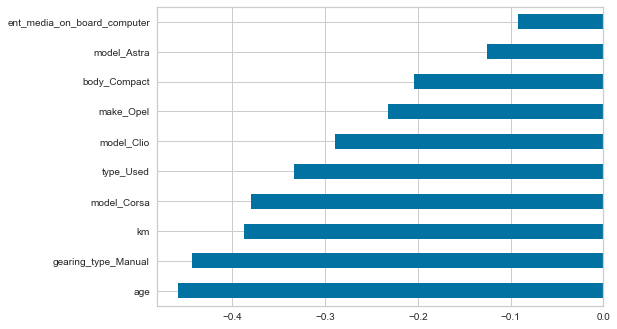

In [84]:
df.corr()["price"].sort_values().head(10).plot.barh()

<AxesSubplot:>

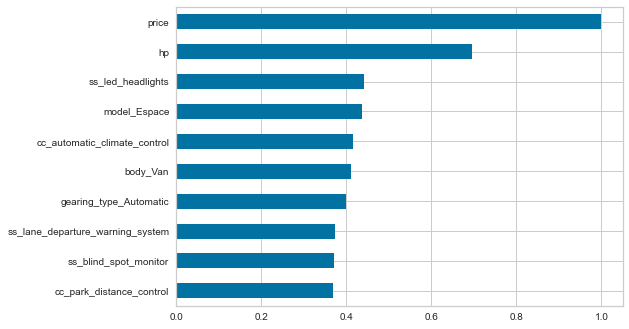

In [85]:
df.corr()["price"].sort_values().tail(10).plot.barh()

<AxesSubplot:xlabel='price'>

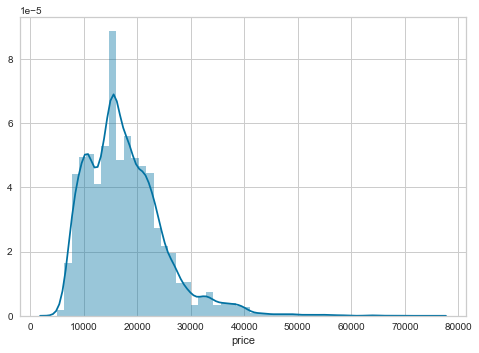

In [86]:
sns.distplot(df.price)

<AxesSubplot:ylabel='price'>

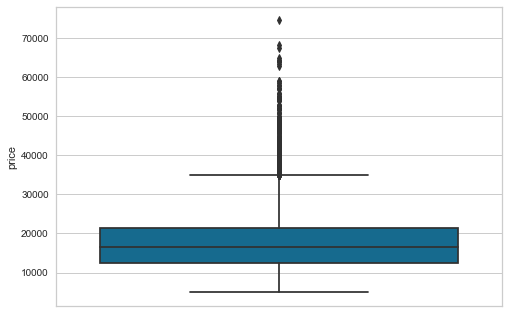

In [87]:
sns.boxplot(df.price, orient="v")

In [88]:
X=df.drop(["price"], axis=1)

In [89]:
y=df["price"]

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [91]:
X.shape

(14990, 135)

In [92]:
X_train.shape

(11992, 135)

In [93]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [94]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
y_pred=lm.predict(X_test)

In [96]:
eval_metrics(y_test, y_pred)

r2_score: 0.8917673810996842 
 mae: 1672.3867626669385 
 mse: 5481554.524313047 
 rmse: 2341.271988538078


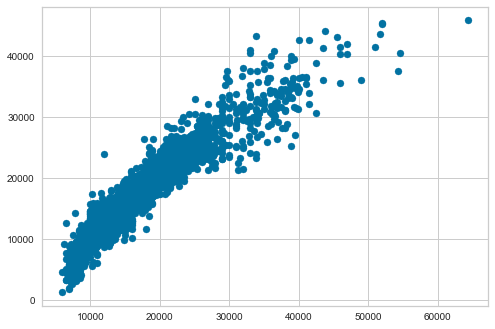

In [97]:
plt.scatter(y_test, y_pred)

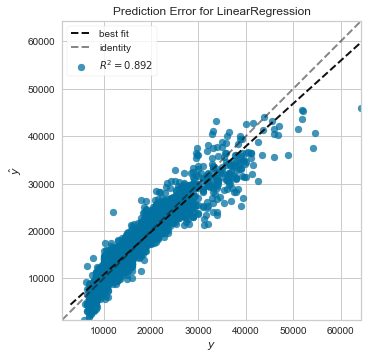

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [98]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

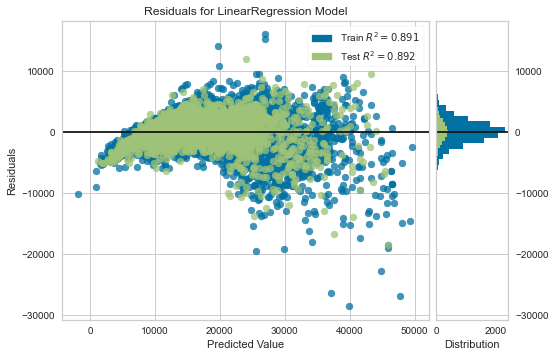

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [99]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [100]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [101]:
compare.sample(10)

,Actual,Pred
15609,28900,33265.488036
9450,8900,8277.412778
14471,19190,19743.562059
15873,48900,36082.413072
11208,15500,15087.837183
9596,9500,10084.671550
6692,16790,18938.165973
4364,16290,16681.112217
2200,21620,20715.080029
15671,38875,39970.800188


In [102]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train)
cv_scores.mean()

0.885367580988882

In [103]:
cv_scores

array([0.88213508, 0.88024083, 0.89031947, 0.88202718, 0.89211535])

**2.Ridge Regression**

In [104]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [105]:
ridge_model=Ridge(normalize=True)

In [106]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [107]:
y_pred=ridge_model.predict(X_test)

In [108]:
eval_metrics(y_test, y_pred)

r2_score: 0.8390485500575233 
 mae: 1963.3528962238245 
 mse: 8151555.026488914 
 rmse: 2855.0928227448076


In [109]:
alpha_space = np.linspace(0.1, 20, 50)

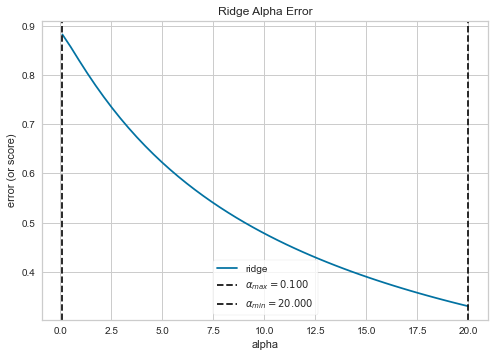

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [110]:
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = alpha_space 

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)

visualizer.fit(X_train, y_train)
visualizer.show()

In [111]:
ridge_model = Ridge(0.1, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.890868549667418 
 mae: 1663.8811495596697 
 mse: 5527076.785108303 
 rmse: 2350.9735823926867


In [112]:
ridge_model = Ridge(0.01, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.892059606321106 
 mae: 1668.7977194129378 
 mse: 5466754.4714188455 
 rmse: 2338.1091658472333


In [113]:
ridge_model = Ridge(17, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.37713804480427027 
 mae: 4257.277794789257 
 mse: 31545497.1266122 
 rmse: 5616.537823838828


**3. LASSO REGRESSION**

In [114]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [115]:
lasso_model = Lasso(normalize=True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8840377602740636 
 mae: 1698.8273169126867 
 mse: 5873029.279690901 
 rmse: 2423.4333660513344


In [116]:
alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, normalize=True, cv = 5).fit(X_train, y_train)

In [117]:
lasso_cv_model.alpha_

0.1

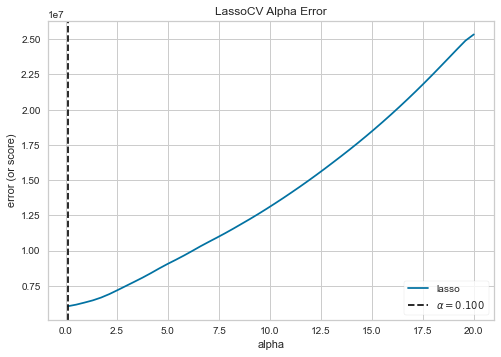

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [118]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = alpha_space

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [119]:
lasso_model = Lasso(0.1, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8917796626649902 
 mae: 1668.1568590125214 
 mse: 5480932.511554304 
 rmse: 2341.1391482682748


In [120]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

In [121]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

113

In [122]:
lasso_model = Lasso(10, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.7303519997650454 
 mae: 2681.5807547157997 
 mse: 13656605.842839582 
 rmse: 3695.484520714379


In [123]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

8

In [124]:
significant_features.sort_values(by="coef", ascending=False)

,features,coef
99,model_Espace,3220.399998
90,make_Audi,2155.137499
21,ss_led_headlights,209.583059
51,cc_automatic_climate_control,139.795730
1,hp,129.370194
2,km,-0.013474
124,gearing_type_Manual,-685.951999
34,age,-1449.178638


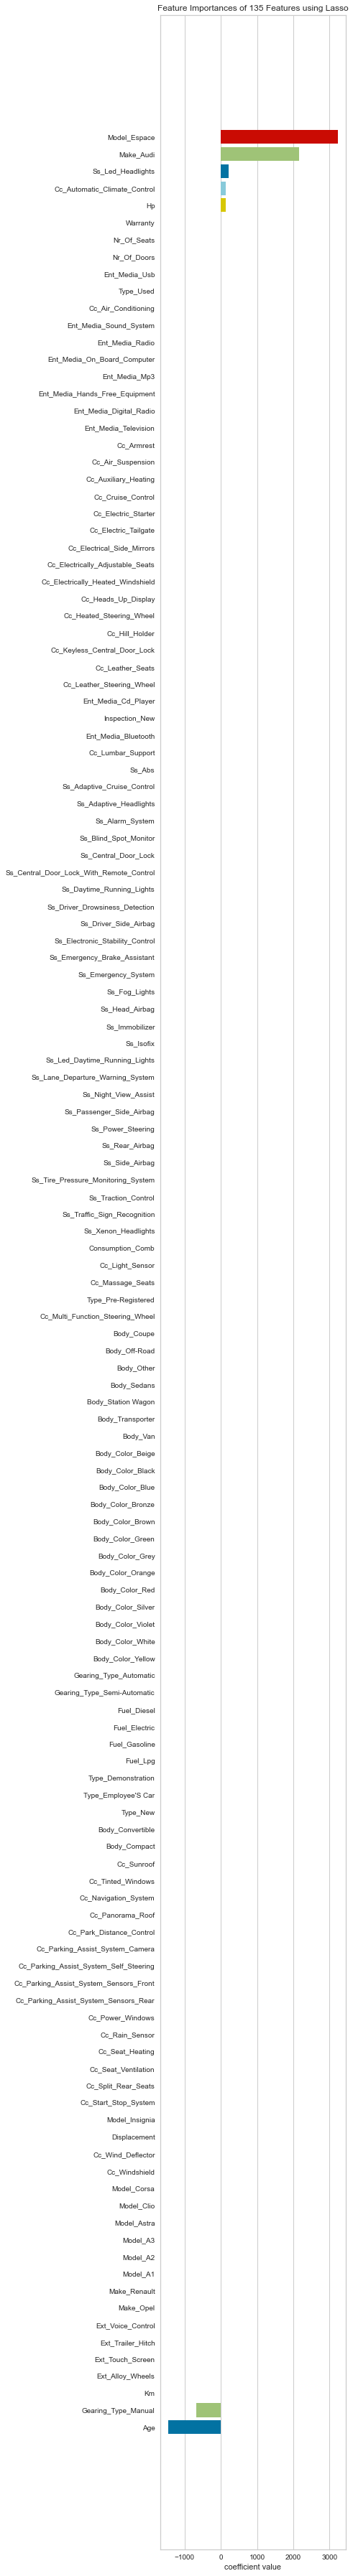

<AxesSubplot:title={'center':'Feature Importances of 135 Features using Lasso'}, xlabel='coefficient value'>

In [125]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

**SAVING SCI-KIT LEARN MODEL**

In [126]:
df2=pd.read_pickle("golden_data_not_dummy.pkl")

In [127]:
df2.head()

,displacement,make,model,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,...,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
0,1422.0,Audi,A1,66.0,56013,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1798.0,Audi,A1,141.0,80000,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1598.0,Audi,A1,85.0,83450,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1422.0,Audi,A1,66.0,73000,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1422.0,Audi,A1,66.0,16200,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [128]:
new_list=["hp", "age", "km", "model"]

In [129]:
df2.shape

(14994, 98)

In [130]:
X=df2[new_list]

In [131]:
X.head()

,hp,age,km,model
0,66.0,3,56013,A1
1,141.0,2,80000,A1
2,85.0,3,83450,A1
3,66.0,3,73000,A1
4,66.0,3,16200,A1


In [132]:
y=df2["price"]

In [133]:
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [134]:
X=pd.get_dummies(X)

In [135]:
X.head()

,hp,age,km,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,66.0,3,56013,1,0,0,0,0,0,0,0
1,141.0,2,80000,1,0,0,0,0,0,0,0
2,85.0,3,83450,1,0,0,0,0,0,0,0
3,66.0,3,73000,1,0,0,0,0,0,0,0
4,66.0,3,16200,1,0,0,0,0,0,0,0


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.822555894979923 
 mae: 2107.66649897252 
 mse: 9265854.348411927 
 rmse: 3043.9865880801653


In [137]:
import pickle
pickle.dump(lm, open("saved_model", 'wb'))

In [138]:
project_model=pickle.load(open("saved_model", "rb"))

In [139]:
my_dict = {
    "hp": 200,
    "age": 1,
    "km": 100000,
    "model": 'A3'
}

In [140]:
df = pd.DataFrame.from_dict([my_dict])

In [141]:
df.head()

,hp,age,km,model
0,200,1,100000,A3


In [142]:
columns=X.columns
columns

Index(['hp', 'age', 'km', 'model_A1', 'model_A2', 'model_A3', 'model_Astra',
       'model_Clio', 'model_Corsa', 'model_Espace', 'model_Insignia'],
      dtype='object')

In [143]:
df = pd.get_dummies(df).reindex(columns=columns, fill_value=0)

In [144]:
df.head()

,hp,age,km,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,200,1,100000,0,0,1,0,0,0,0,0


In [145]:
pred=list(project_model.predict(df))

In [146]:
pred

[34805.699830182995]